In [1]:
#Importing neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
os.chdir('C:\\Users\\SAYAK\\Downloads')

### IMPORTING DATA

In [4]:
df = pd.read_csv('coupon.csv')

In [5]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
df.shape

(12684, 25)

In [7]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [9]:
df.describe(include=['O']).T

,count,unique,top,freq
destination,12684,3,No Urgent Place,6283
passanger,12684,4,Alone,7305
weather,12684,3,Sunny,10069
coupon,12684,5,Coffee House,3996
expiration,12684,2,1d,7091
gender,12684,2,Female,6511
age,12684,8,21,2653
maritalStatus,12684,5,Married partner,5100
education,12684,6,Some college - no degree,4351
occupation,12684,25,Unemployed,1870


In [10]:
#Checking for null value in the data set

df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [11]:
(df.isnull().sum() / len(df) * 100)

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

### DATA MAPPING

In [12]:
df.rename(columns = {'Accept(Y/N?)' : 'Accept'}, inplace = True)

In [13]:
df['age'].mask(df['age'] == 'below21', '<21', inplace=True)

In [14]:
df['age'].mask(df['age'] == '21', '21-25', inplace=True)

In [15]:
df['age'].mask(df['age'] == '26', '26-30', inplace=True)

In [16]:
df['age'].mask(df['age'] == '31', '31-35', inplace=True)

In [17]:
df['age'].mask(df['age'] == '36', '36-40', inplace=True)

In [18]:
df['age'].mask(df['age'] == '41', '41-45', inplace=True)

In [19]:
df['age'].mask(df['age'] == '46', '46-50', inplace=True)

In [20]:
df['age'].mask(df['age'] == '50plus', '>50', inplace=True)

In [21]:
df['age'].value_counts()

21-25    2653
26-30    2559
31-35    2039
>50      1788
36-40    1319
41-45    1093
46-50     686
<21       547
Name: age, dtype: int64

In [22]:
df_eda = df.copy()

In [23]:
df_eda['Accept'].value_counts()

1    7210
0    5474
Name: Accept, dtype: int64

In [24]:
for i in df_eda.columns:
    print(f'The unique values in {i} is ',df_eda[i].unique(),sep = '\n')
    print('-------------------------------------------------------')
    
    # checked unique values in each column

The unique values in destination is 
['No Urgent Place' 'Home' 'Work']
-------------------------------------------------------
The unique values in passanger is 
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
-------------------------------------------------------
The unique values in weather is 
['Sunny' 'Rainy' 'Snowy']
-------------------------------------------------------
The unique values in temperature is 
[55 80 30]
-------------------------------------------------------
The unique values in coupon is 
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
-------------------------------------------------------
The unique values in expiration is 
['1d' '2h']
-------------------------------------------------------
The unique values in gender is 
['Female' 'Male']
-------------------------------------------------------
The unique values in age is 
['21-25' '46-50' '26-30' '31-35' '41-45' '>50' '36-40' '<21']
-----------------------------------------------

In [25]:
#Checking for value counts for each column

for i in df_eda.columns:
    print(f'The value counts for each {i} is ',df_eda[i].value_counts(),sep = '\n')
    print('-------------------------------------------------------')

The value counts for each destination is 
No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64
-------------------------------------------------------
The value counts for each passanger is 
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64
-------------------------------------------------------
The value counts for each weather is 
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64
-------------------------------------------------------
The value counts for each temperature is 
80    6528
55    3840
30    2316
Name: temperature, dtype: int64
-------------------------------------------------------
The value counts for each coupon is 
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64
-------------------------------------------------------


In [26]:
#Converting all the columns into categorical data type

for i in df_eda.columns:
    df[i] = df[i].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  category
 1   passanger             12684 non-null  category
 2   weather               12684 non-null  category
 3   temperature           12684 non-null  category
 4   coupon                12684 non-null  category
 5   expiration            12684 non-null  category
 6   gender                12684 non-null  category
 7   age                   12684 non-null  category
 8   maritalStatus         12684 non-null  category
 9   has_children          12684 non-null  category
 10  education             12684 non-null  category
 11  occupation            12684 non-null  category
 12  income                12684 non-null  category
 13  car                   108 non-null    category
 14  Bar                   12577 non-null  category
 15  Co

AxesSubplot(0.135,0.125;0.755x0.755)


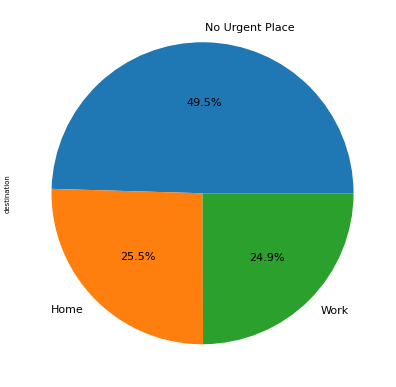

AxesSubplot(0.135,0.125;0.755x0.755)


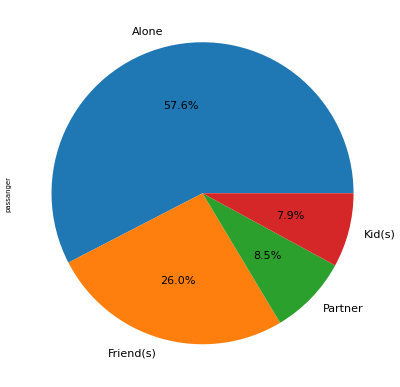

AxesSubplot(0.135,0.125;0.755x0.755)


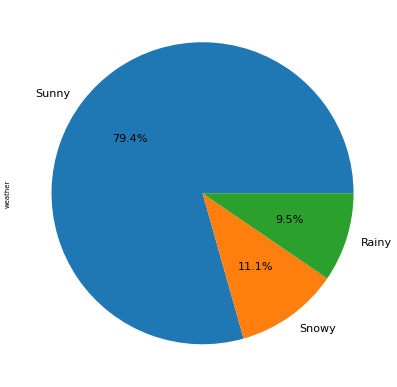

AxesSubplot(0.135,0.125;0.755x0.755)


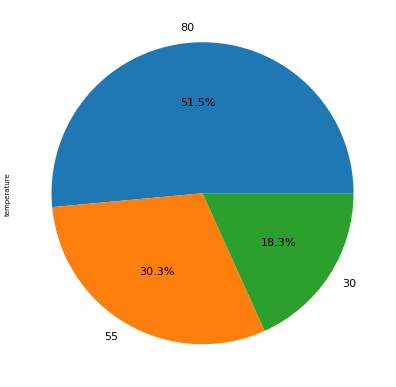

AxesSubplot(0.135,0.125;0.755x0.755)


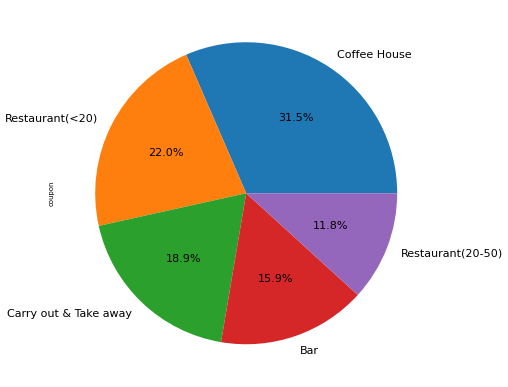

AxesSubplot(0.135,0.125;0.755x0.755)


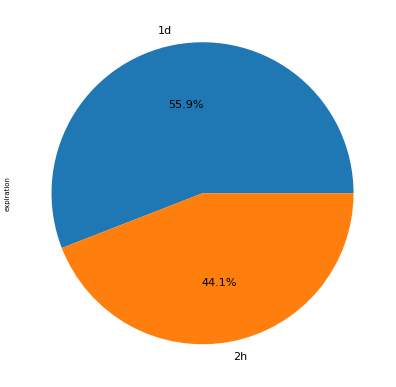

AxesSubplot(0.135,0.125;0.755x0.755)


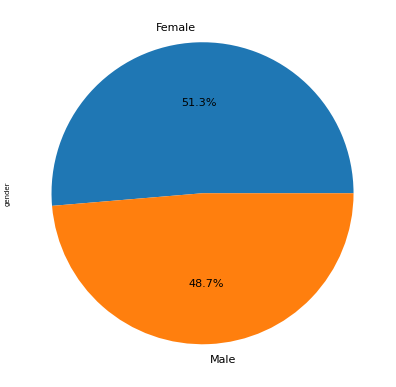

AxesSubplot(0.135,0.125;0.755x0.755)


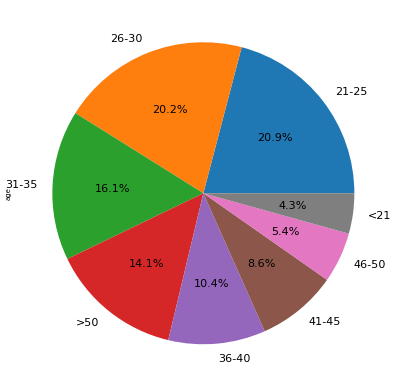

AxesSubplot(0.135,0.125;0.755x0.755)


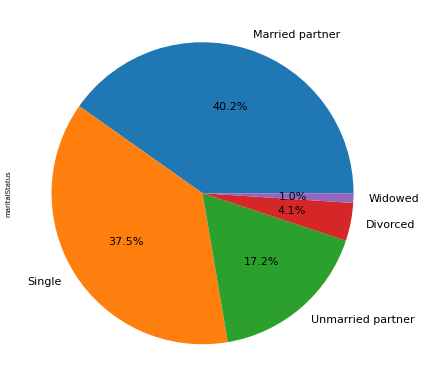

AxesSubplot(0.135,0.125;0.755x0.755)


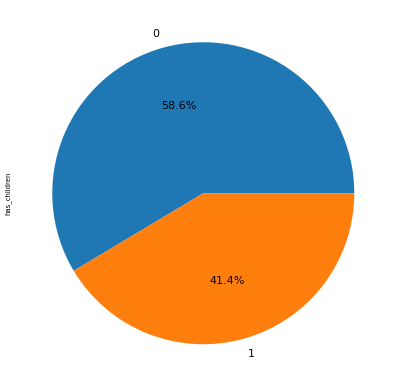

AxesSubplot(0.135,0.125;0.755x0.755)


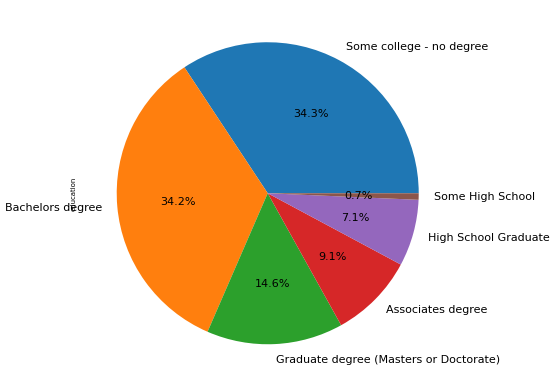

AxesSubplot(0.135,0.125;0.755x0.755)


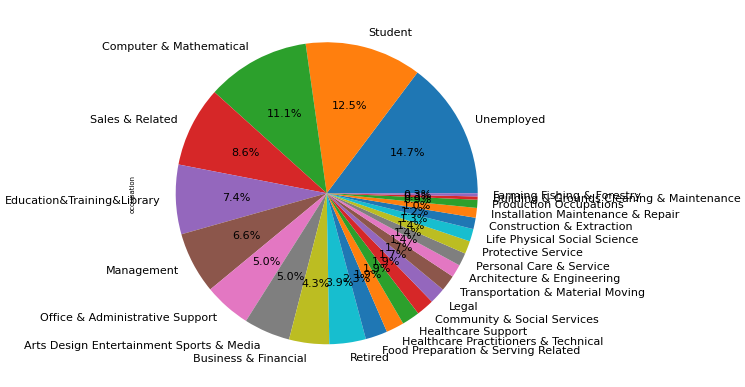

AxesSubplot(0.135,0.125;0.755x0.755)


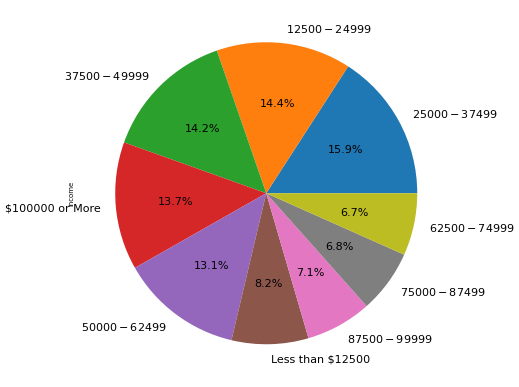

AxesSubplot(0.135,0.125;0.755x0.755)


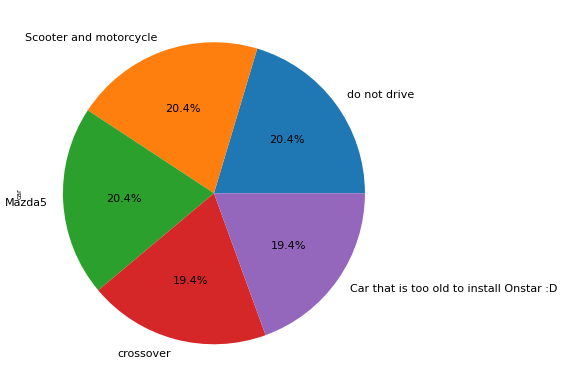

AxesSubplot(0.135,0.125;0.755x0.755)


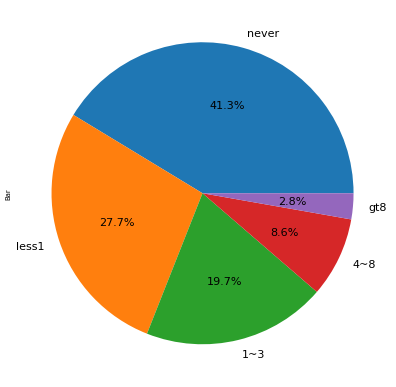

AxesSubplot(0.135,0.125;0.755x0.755)


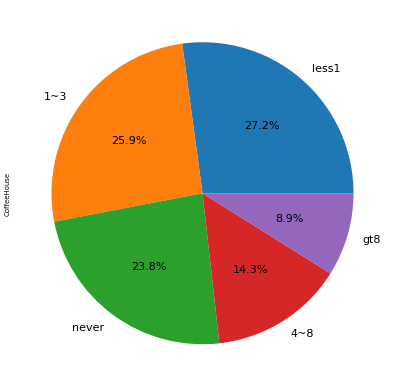

AxesSubplot(0.135,0.125;0.755x0.755)


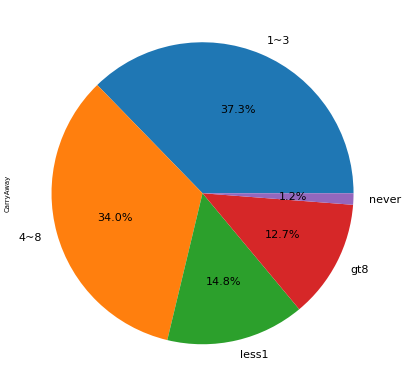

AxesSubplot(0.135,0.125;0.755x0.755)


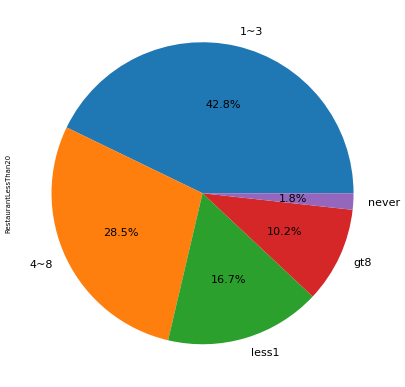

AxesSubplot(0.135,0.125;0.755x0.755)


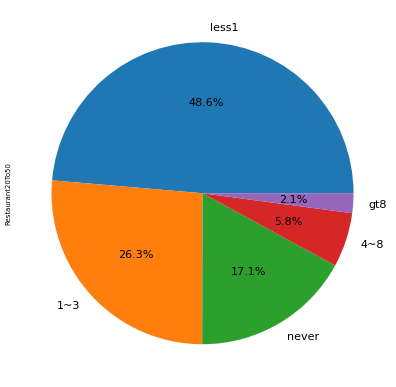

AxesSubplot(0.135,0.125;0.755x0.755)


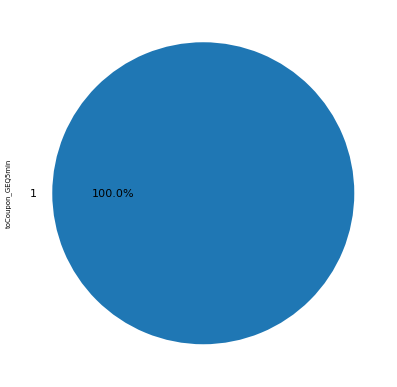

AxesSubplot(0.135,0.125;0.755x0.755)


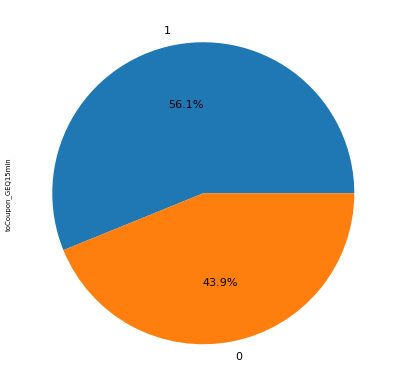

AxesSubplot(0.135,0.125;0.755x0.755)


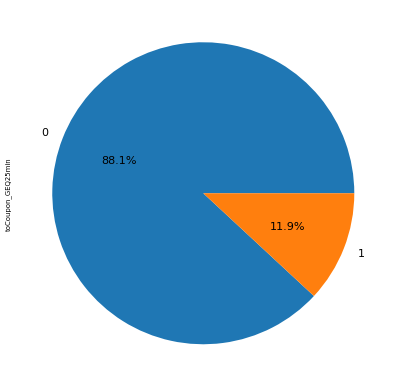

AxesSubplot(0.135,0.125;0.755x0.755)


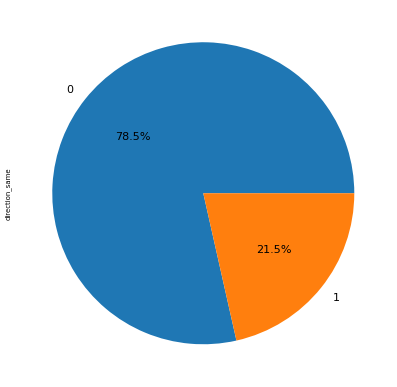

AxesSubplot(0.135,0.125;0.755x0.755)


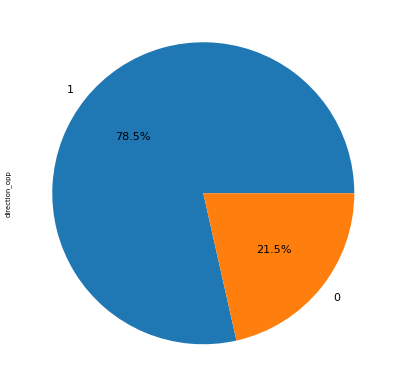

AxesSubplot(0.135,0.125;0.755x0.755)


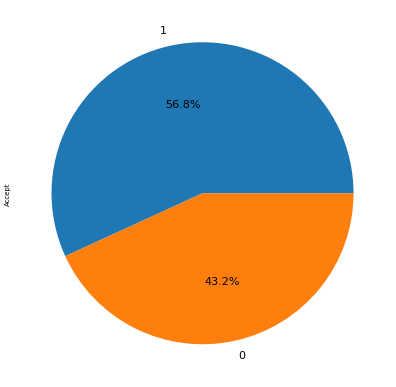

In [27]:
#Checking for distribution of value for each column using pie chart

for i in df_eda.columns:
    plt.figure(figsize=(10, 10), dpi=50)
    print(df[i].value_counts().plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
    plt.show()

### EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Accept', ylabel='count'>

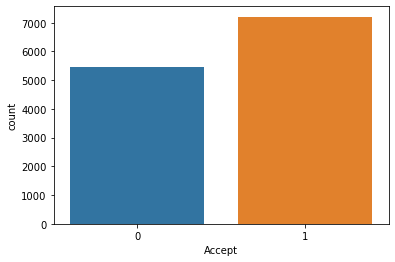

In [28]:
sn.countplot(x = 'Accept', data = df_eda)

<AxesSubplot:xlabel='weather', ylabel='count'>

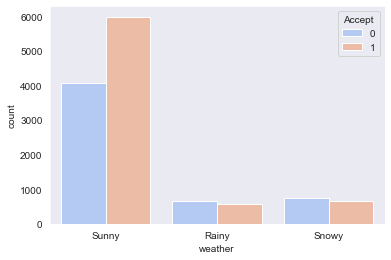

In [29]:
sn.set_style('dark')
sn.countplot(x = 'weather', hue = 'Accept', data = df_eda, palette = 'coolwarm')

<AxesSubplot:xlabel='gender', ylabel='count'>

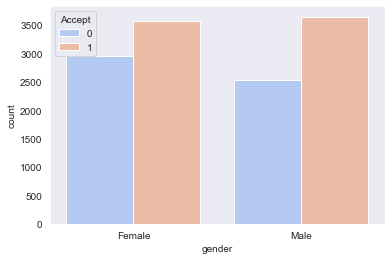

In [30]:
sn.set_style('dark')
sn.countplot(x = 'gender', hue = 'Accept', data = df_eda, palette = 'coolwarm')

<AxesSubplot:xlabel='destination', ylabel='count'>

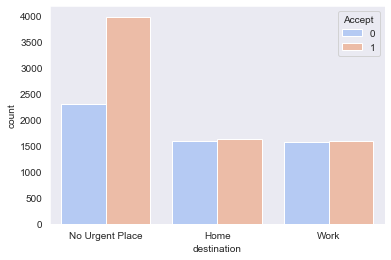

In [31]:
sn.set_style('dark')
sn.countplot(x = 'destination', hue = 'Accept', data = df_eda, palette = 'coolwarm')

<AxesSubplot:xlabel='passanger', ylabel='count'>

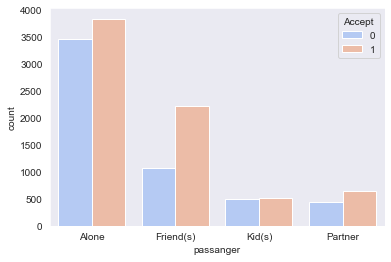

In [32]:
sn.set_style('dark')
sn.countplot(x = 'passanger', hue = 'Accept', data = df_eda, palette = 'coolwarm')

<AxesSubplot:xlabel='age', ylabel='count'>

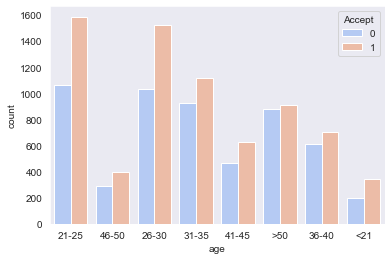

In [33]:
sn.set_style('dark')
sn.countplot(x = 'age', hue = 'Accept', data = df_eda, palette = 'coolwarm')

<AxesSubplot:xlabel='temperature', ylabel='count'>

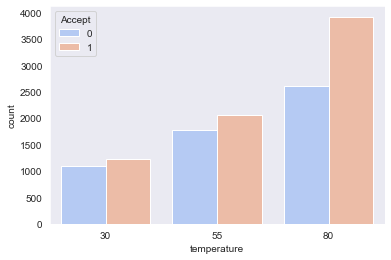

In [34]:
sn.set_style('dark')
sn.countplot(x = 'temperature', hue = 'Accept', data = df_eda, palette = 'coolwarm')

<AxesSubplot:xlabel='count', ylabel='coupon'>

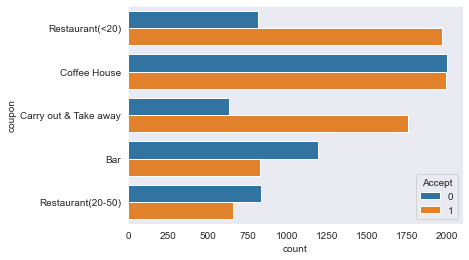

In [35]:
sn.set_style('dark')
sn.countplot(y = 'coupon', hue = 'Accept', data = df_eda)

<AxesSubplot:xlabel='expiration', ylabel='count'>

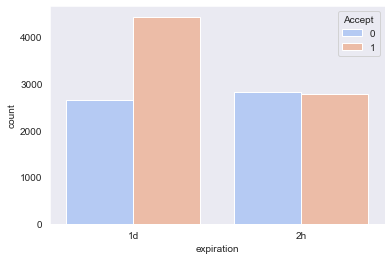

In [36]:
sn.set_style('dark')
sn.countplot(x = 'expiration', hue = 'Accept', data = df_eda, palette = 'coolwarm')

<AxesSubplot:xlabel='maritalStatus', ylabel='count'>

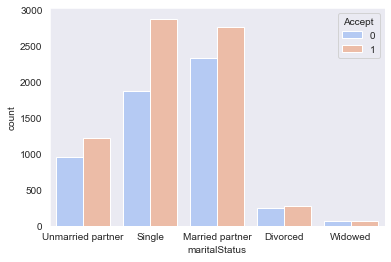

In [37]:
sn.set_style('dark')
sn.countplot(x = 'maritalStatus', hue = 'Accept', data = df_eda, palette = 'coolwarm')

<AxesSubplot:xlabel='has_children', ylabel='count'>

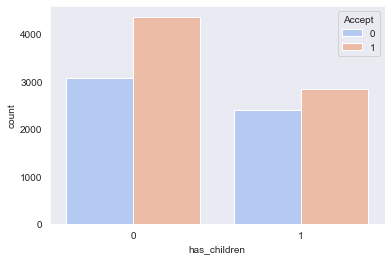

In [38]:
sn.set_style('dark')
sn.countplot(x = 'has_children', hue = 'Accept', data = df_eda, palette = 'coolwarm')

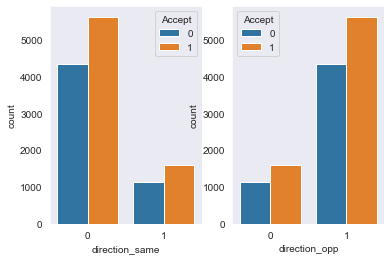

In [39]:
f, axes = plt.subplots(1, 2)
sn.set_style('darkgrid')
sn.countplot(x = 'direction_same', hue = 'Accept', data = df_eda, ax=axes[0])
sn.countplot(x = 'direction_opp', hue = 'Accept', data = df_eda, ax=axes[1])
plt.show()

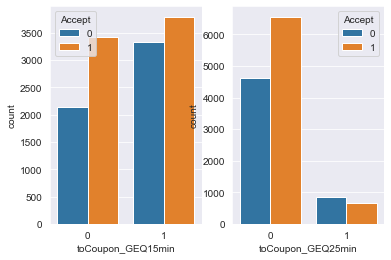

In [40]:
f, axes = plt.subplots(1, 2)
sn.set_style('darkgrid')
sn.countplot(x = 'toCoupon_GEQ15min', hue = 'Accept', data = df_eda, ax=axes[0])
sn.countplot(x = 'toCoupon_GEQ25min', hue = 'Accept', data = df_eda, ax=axes[1])
plt.show()

<AxesSubplot:xlabel='count', ylabel='income'>

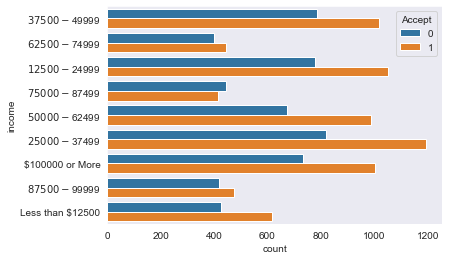

In [44]:
sn.set_style('dark')
sn.countplot(data = df_eda, y="income", hue = "Accept")

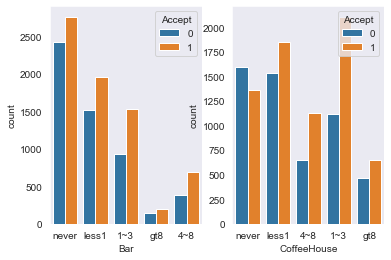

In [45]:
f, axes = plt.subplots(1, 2)
sn.set_style('darkgrid')
sn.countplot(x = 'Bar', hue = 'Accept', data = df_eda, ax=axes[0])
sn.countplot(x = 'CoffeeHouse', hue = 'Accept', data = df_eda, ax=axes[1])
plt.show()

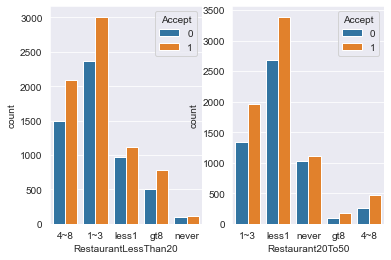

In [46]:
f, axes = plt.subplots(1, 2)
sn.set_style('darkgrid')
sn.countplot(x = 'RestaurantLessThan20', hue = 'Accept', data = df_eda, ax=axes[0])
sn.countplot(x = 'Restaurant20To50', hue = 'Accept', data = df_eda, ax=axes[1])
plt.show()

<AxesSubplot:xlabel='count', ylabel='CarryAway'>

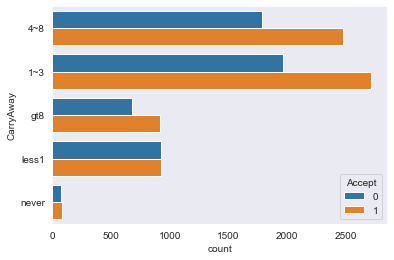

In [47]:
sn.set_style('dark')
sn.countplot(data = df_eda, y="CarryAway", hue = "Accept")

<AxesSubplot:xlabel='count', ylabel='coupon'>

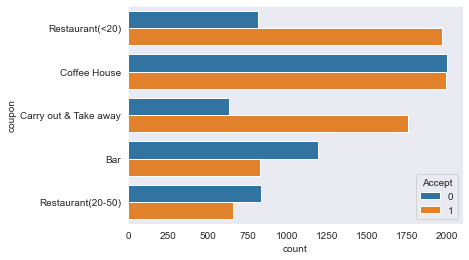

In [48]:
sn.set_style('dark')
sn.countplot(data = df_eda, y="coupon", hue = "Accept")

<AxesSubplot:xlabel='count', ylabel='education'>

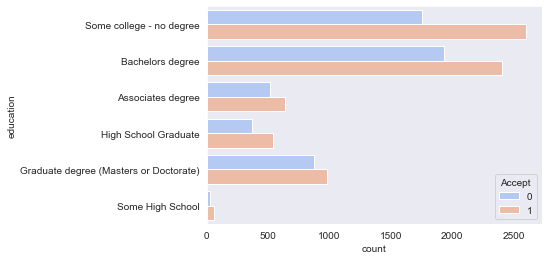

In [49]:
sn.set_style('dark')
sn.countplot(y = 'education', hue = 'Accept', data = df_eda, palette = 'coolwarm')

<AxesSubplot:xlabel='count', ylabel='occupation'>

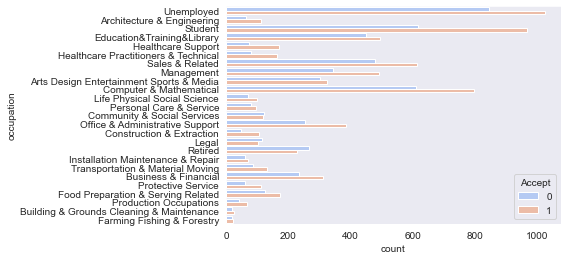

In [50]:
sn.set_style('dark')
sn.countplot(y = 'occupation', hue = 'Accept', data = df_eda, palette = 'coolwarm')

In [51]:
corr = df_eda.corr()

<AxesSubplot:>

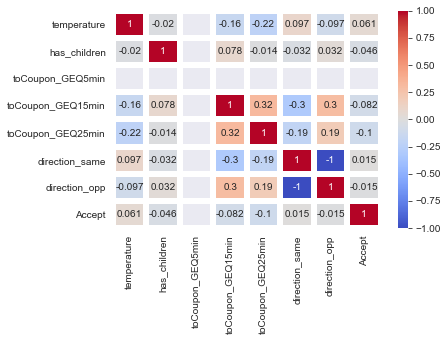

In [52]:
sn.heatmap(corr, cmap = 'coolwarm', annot = True, linewidths = 5)

### DATA PREPROCESSING AND FEATURE ENGINEERING

In [53]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept'],
      dtype='object')

In [54]:
# Removing columns which have nearly 99% missing values as well as those columns which are irrelevant

df.drop(['car'], axis = 1, inplace = True)

In [55]:
#Removing the rows which contain missing values

df.dropna(inplace = True)

In [56]:
#Removing duplicate rows

df.drop_duplicates(inplace = True)

In [57]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept                  0
dtype: int64

In [58]:
df.duplicated().sum()

0

In [59]:
# Import label encoder to transform string values of each column into numeric value
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for i in df.columns:
    df[i] = label_encoder.fit_transform(df[i])

In [60]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept
22,1,0,2,1,4,0,1,0,2,0,...,3,1,1,3,0,0,0,0,1,1
23,1,1,2,2,2,1,1,0,2,0,...,3,1,1,3,0,0,0,0,1,0
24,1,1,2,2,0,0,1,0,2,0,...,3,1,1,3,0,0,0,0,1,1
25,1,1,2,2,1,1,1,0,2,0,...,3,1,1,3,0,1,0,0,1,0
26,1,1,2,2,2,0,1,0,2,0,...,3,1,1,3,0,0,0,0,1,0


In [61]:
#Defining dependent and independent variables

X = df.drop(['Accept'], axis = 1)
Y = df['Accept']

In [62]:
#Splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [63]:
# Importing library for feature selection to understand the columns which have highest importance on dependent variable

from sklearn.ensemble import ExtraTreesClassifier

In [64]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion = 'entropy')

In [65]:
extra_tree_forest.fit(X_train,y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=5)

In [66]:
feature_importance = extra_tree_forest.feature_importances_

In [67]:
feature_rank = pd.DataFrame({'feature':X.columns,'importance':feature_importance})

In [93]:
#checking features which have highest importance on target column
feature_rank.sort_values('importance', ascending = False).head(10)

,feature,importance,cumsum
4,coupon,0.119797,28.013660
12,income,0.067916,66.569398
11,occupation,0.067130,59.777834
14,CoffeeHouse,0.065537,78.471080
7,age,0.062102,40.724429
15,CarryAway,0.054181,83.889206
13,Bar,0.053480,71.917389
16,RestaurantLessThan20,0.053086,89.197843
1,passanger,0.053027,9.864915
10,education,0.052677,53.064796


In [69]:
feature_rank['cumsum'] = feature_rank['importance'].cumsum()*100
feature_rank

,feature,importance,cumsum
0,destination,0.045622,4.562202
1,passanger,0.053027,9.864915
2,weather,0.021409,12.005820
3,temperature,0.040281,16.033921
4,coupon,0.119797,28.013660
5,expiration,0.033494,31.363053
6,gender,0.031512,34.514236
7,age,0.062102,40.724429
8,maritalStatus,0.044182,45.142589
9,has_children,0.026545,47.797128


In [70]:
#Importing logistic regression and checking for evaluation metrices

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.6203389830508474

In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

results = confusion_matrix(y_test, predictions) 

results

array([[ 708,  847],
       [ 497, 1488]], dtype=int64)

In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.59      0.46      0.51      1555
           1       0.64      0.75      0.69      1985

    accuracy                           0.62      3540
   macro avg       0.61      0.60      0.60      3540
weighted avg       0.62      0.62      0.61      3540



In [74]:
from sklearn .metrics import roc_auc_score


auc = np.round(roc_auc_score(y_test, predictions), 3)

print("Auc for our sample data is {}". format(auc))

Auc for our sample data is 0.602


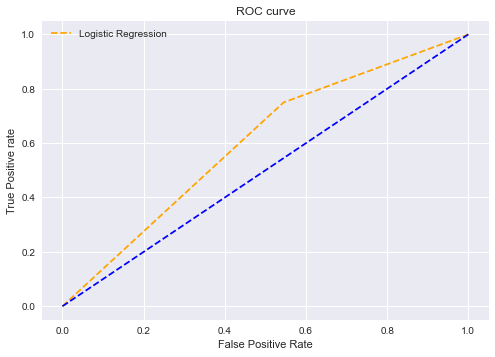

In [75]:
from sklearn.metrics import roc_curve

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predictions, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [76]:
#Importing random forest classifier and checking for evaluation metrices

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))

print('-------------------'*5)

print(classification_report(y_test,rfc_pred))

[[ 988  567]
 [ 383 1602]]
-----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      1555
           1       0.74      0.81      0.77      1985

    accuracy                           0.73      3540
   macro avg       0.73      0.72      0.72      3540
weighted avg       0.73      0.73      0.73      3540



In [78]:
#Importing xgboost classifier and checking for evaluation metrices

from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [79]:
y_pred = xgb.predict(X_test)

In [80]:
print(confusion_matrix(y_test, y_pred))

print('-------------------'*5)

print(classification_report(y_test, y_pred))

[[1024  531]
 [ 382 1603]]
-----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.66      0.69      1555
           1       0.75      0.81      0.78      1985

    accuracy                           0.74      3540
   macro avg       0.74      0.73      0.74      3540
weighted avg       0.74      0.74      0.74      3540



In [81]:
#Importing gradient boosting classifier and checking for evaluation metrices

from sklearn.ensemble import GradientBoostingClassifier

# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state = 5, max_features = 5)

# Fit to training set
gbc.fit(X_train, y_train)

# Predict on test set
pred_y = gbc.predict(X_test)

In [82]:
acc = accuracy_score(y_test, pred_y)

print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.71


In [83]:
print(confusion_matrix(y_test,pred_y))

[[ 921  634]
 [ 378 1607]]


In [84]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.71      0.59      0.65      1555
           1       0.72      0.81      0.76      1985

    accuracy                           0.71      3540
   macro avg       0.71      0.70      0.70      3540
weighted avg       0.71      0.71      0.71      3540



In [85]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [86]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6768361581920904


In [87]:
#! pip install lightgbm

import lightgbm as lgb

from lightgbm import LGBMClassifier

model = LGBMClassifier()

model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4701, number of negative: 3556
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 8257, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.569335 -> initscore=0.279139
[LightGBM] [Info] Start training from score 0.279139


LGBMClassifier()

In [88]:
pred = model.predict(X_test)

print(pred)

print('-------' *5)

accuracy = model.score(X_test, y_test)

print(accuracy)

[1 1 0 ... 0 0 1]
-----------------------------------
0.7556497175141242


In [89]:
print(confusion_matrix(y_test,pred))

[[ 995  560]
 [ 305 1680]]


In [90]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70      1555
           1       0.75      0.85      0.80      1985

    accuracy                           0.76      3540
   macro avg       0.76      0.74      0.75      3540
weighted avg       0.76      0.76      0.75      3540



In [94]:
#checking cross validation method to improve the performence of the model
from sklearn.model_selection import KFold, cross_val_score

kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 9437, Test set:2360
Fold:2, Train set: 9437, Test set:2360
Fold:3, Train set: 9438, Test set:2359
Fold:4, Train set: 9438, Test set:2359
Fold:5, Train set: 9438, Test set:2359


In [92]:
#calculating mean score of cross validated accuracy
score = cross_val_score(model, X, Y, cv= kf, scoring= "accuracy")
print(f'Scores for each fold: {score}')
score.mean()

[LightGBM] [Info] Number of positive: 5355, number of negative: 4082
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 9437, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567447 -> initscore=0.271444
[LightGBM] [Info] Start training from score 0.271444
[LightGBM] [Info] Number of positive: 5381, number of negative: 4056
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 9437, number of used features: 22
[LightGBM] [Info] [bin

0.7484960950129688